# TP6 Réseau de neurones pour un problème de régression


### Table of Contents

* [0. Préparation des données](#chapter0)
* [1. Créer des modèles de références (*baseline*)](#chapter1)
* [2. Créer et entraîner un réseau de neurones](#chapter2)
* [3. *(Optionnel)* Classe `nn.Module`, `optimiser` et `dataset` de Pytorch](#chapter3)


Dans ce TP, on va utiliser `PyTorch` (https://pytorch.org/) pour créer et entraîner un réseau de neurones. 

Référence :

- Installation de `PyTorch` : https://pytorch.org/get-started/locally/. (Si vous utilisez Google colab, `PyTorch` est déjè installé. )

- Une bonne introduction officielle de `PyTorch` : https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html 

- Pour commencer `PyTorch` plus rapidement : 
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html


In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Exercice 1** : Exécuter la prochaine cellule afin de vérifier si vous avez bien installé `PyTorch`.

In [2]:
import torch
print(torch.__version__)

ModuleNotFoundError: No module named 'torch'

Si `PyTorch` est bien installé, on va importer les prochains packages. 

In [16]:
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

## 0. Préparation des données <a class="anchor" id="chapter0"></a>

La fonction à simuler est 

$f(x)=x^2+5\sin(4x)$ .

On va créer l'ensemble d'entraînement et l'ensemble de test comme suit.

**Exercice 2** : 

- Comprendre le fonctionnement de `torch.rand`, `torch.sin` et `torch.normal` dans la prochaine cellule. 
- Comprendre comment créer les données dans la prochaine cellule. 

Indication pour l'exercice 2: 

- torch.rand : https://pytorch.org/docs/stable/generated/torch.rand.html
- torch.sin : https://pytorch.org/docs/stable/generated/torch.sin.html
- torch.normal : https://pytorch.org/docs/stable/generated/torch.normal.html

(Réfléchissez / Devinez la réponse avant de lire la documentation officielle, c'est assez intuitif.)

In [17]:

torch.random.manual_seed(10)

N_train = 10000
N_test = 2000

Xtrain = torch.rand((N_train,1)) *10-5
Xtest = torch.rand((N_test,1)) *10-5

f = lambda x: x**2 - 5*torch.sin(4*x)

Ytrain = f(Xtrain.clone()) + torch.normal(mean = 0, std = 4,size = (N_train,1))
Ytest = f(Xtest.clone()) + torch.normal(mean = 0, std = 4,size = (N_test,1))

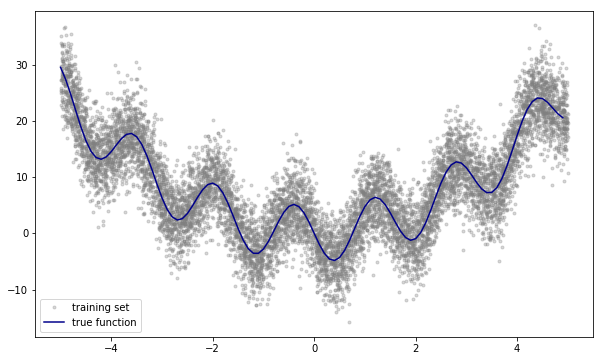

In [18]:
plt.figure(figsize = (10,6))
plt.plot(Xtrain,Ytrain, ".", label = "training set", color = "grey", alpha = 0.3)
plt.plot(torch.arange(-5,5,0.1), f(torch.arange(-5,5,0.1)), color = "darkblue", label = "true function")
plt.legend()

Réponse pour l'exercice 2:









-------------------------------------

## 1. Créer des modèles de références (*baseline*) <a class="anchor" id="chapter1"></a>






**Exercice 3** : Avant de créer un réseau de neurones, on va créer et entraîner quelques modèles de référence. 

1. On va créer d'abord un modèle de régression linéaire, nommé `reg_lin`. Ensuite, entraîner `reg_lin` sur `(Xtrain, Ytrain)`. 

2. Tester le modèle sur `(Xtest, Ytest)` i.e. calculer l'erreur MSE (MSE : Mean Squared Error) de `reg_lin` sur l'ensemble de test `(Xtest, Ytest)` :

    $\text{MSE}_{test}=\frac{1}{\text{N_test}}\sum_{(X_i,Y_i)\in \text{l'ensemble de test}}\left(Y_i-\widehat{f}(X_i)\right)^2$
    
    où $\widehat{f}$ est `reg_lin`.

3. (Optionnel) Tracer la fonction $f$ entre -5 et 5 et les prédictions des données dans `Xtest` par `reg_lin`.


**Indication** : pour calculer MSE, on peut utiliser `mean_squared_error` : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


**Rappel** : pour le modèle de régression linéaire, voir "TP1 Un premier exemple d'apprentissage".


In [19]:
# Réponse pour l'exercice 3

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Créer et entraîner un modèle de régression linéaire 


    # Remplir votre programme ici



# Tester lin_reg sur (Xtest, Ytest)


    # Remplir votre programme ici
    


# (Optionnel) Tracer la courbe de (Xtest, lin_reg.predict(Xtest)), comparer lin_reg.predict(Xtest) et la vrai fonction f


    # Remplir votre programme ici




**Exercice 4** : 

1. On va créer des modèles de régression polynomiale de degré $K$ pour $K\in \{2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40\}$. Entraîner-les sur `(Xtrain, Ytrain)` et tester les modèles sur `(Xtest, Ytest)`en calculant le MSE (voir l'Exercice 3). 

2. Selon les résultats de test, choisir le meilleur modèle de régression polynomiale parmi les modèles de la question 1 et nommer-le `reg_poly_best`. `Print` le degré de `reg_poly_best`.

3. Tracer la fonction $f$ entre -5 et 5 et les prédictions de `reg_poly_best` sur l'ensemble de test. 
 

**Rappel** : pour les modèles polynomiales, voir "TP1 Un premier exemple d'apprentissage".







In [7]:
# Réponse pour l'exercice 4

from sklearn.preprocessing import PolynomialFeatures










On peut remarquer qu'un modèle de régression polynomiale de degré 20 est assez proche de la vraie fonction $f$. 

---------------------------------------


## 2. Créer et entraîner un réseau de neurones <a class="anchor" id="chapter2"></a>


Maintenant on va créer un réseau de neurones avec `nn.Sequential`. 

Référence: https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html 



**Exercice 5** : La cellule suivante définit un réseau de neurones, nommé `my_network`. 

Question : Décrire la structure de ce réseau :

1. Combien de couches cachées dans ce réseau ? 
2. Combien de neurones y a-t-il sur chaque couche cachée? 
3. Quelles sont les fonctions d'activation des couches cachées ? 
4. Quelle est la fonction d'activation de la couche de sortie ?
5. Quelles sont les dimensions de `input` et `output` de ce réseau ?

Indication : Pour `nn.Linear` et `nn.Sigmoid`, voir https://pytorch.org/docs/stable/nn.functional.html 


In [22]:
my_network = nn.Sequential(
          nn.Linear(1, 32),
          nn.Sigmoid(),
    
          nn.Linear(32, 32),
          nn.Sigmoid(),
    
          nn.Linear(32, 1),
        )

Réponse pour l'exercice 5 :








**Exercice 6** : Définir la fonction de perte $l$, nommée `loss_function`, par 
$l(y, \widehat{y})=(y-\widehat{y})^2$. 

Indication : on va utiliser `nn.MSELoss()` : https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html 

Remarque : on va choisir le paramètre par défaut i.e. avec `reduction='mean'` pour comparer dans la suite avec les modèles de référence de la Section 1. 

In [ ]:
# Réponse pour l'exercice 6

loss_function = # Remplir votre programme ici


### Entraînement du réseau de neurones par la descente de gradient (admettre)



On va utiliser la descente de gradient stochastique avec batch_size=3000.

On va admettre cette partie de programme car l'autograd de Pytorch n'est pas inclu dans le cours. 

- Référence de l'autograd : 

  https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html; 
  
  https://pytorch.org/docs/stable/notes/autograd.html

On va utiliser le package `tqdm` pour voir l'avancement de la boucle `for`.

**! Attention : Installer tqdm** avant d'utiliser : https://pypi.org/project/tqdm/ 

La boucle `for` de la prochaine cellule a besoin d'environ 3 minutes.


In [24]:
from tqdm import tqdm     

# tqdm est un package pour voir l'avancement de la boucle "for"
# Installer tqdm avant d'utiliser : https://pypi.org/project/tqdm/ 

learning_rate = 1e-2
error_train=[]
error_test=[]
batch_size=3000

for t in tqdm(range(50000)):
    
    # On choisit aléatoirement un mini-batch pour la SGD.
    batch = np.random.choice(N_train, batch_size)
    X_batch, y_batch = Xtrain[batch], Ytrain[batch]
    
    # Calcul forward 
    Y_pred = my_network(X_batch)
    loss=loss_function(Y_pred,y_batch)
    my_network.zero_grad()
    
    # Calcul backward 
    loss.backward()
    with torch.no_grad():
        for param in my_network.parameters():
            param -= learning_rate * param.grad
    
    # Vérifier s'il y a un sur-apprentissage
    if t%10000==0:
        print (loss_function(my_network(Xtrain),Ytrain))
        print (loss_function(my_network(Xtest),Ytest))
        error_train.append(loss_function(my_network(Xtrain),Ytrain))
        error_test.append(loss_function(my_network(Xtest),Ytest))
    
        

  0%|          | 32/50000 [00:00<02:40, 311.42it/s]

tensor(130.8579, grad_fn=<MseLossBackward>)
tensor(127.7833, grad_fn=<MseLossBackward>)


 20%|██        | 10029/50000 [00:41<02:27, 271.76it/s]

tensor(27.3050, grad_fn=<MseLossBackward>)
tensor(27.7409, grad_fn=<MseLossBackward>)


 40%|████      | 20049/50000 [01:19<01:58, 253.21it/s]

tensor(23.1960, grad_fn=<MseLossBackward>)
tensor(23.8002, grad_fn=<MseLossBackward>)


 60%|██████    | 30038/50000 [01:58<01:13, 271.16it/s]

tensor(19.5347, grad_fn=<MseLossBackward>)
tensor(20.3506, grad_fn=<MseLossBackward>)


 80%|████████  | 40037/50000 [02:36<00:39, 255.43it/s]

tensor(16.1950, grad_fn=<MseLossBackward>)
tensor(16.8987, grad_fn=<MseLossBackward>)


100%|██████████| 50000/50000 [03:13<00:00, 258.00it/s]


In [25]:
loss_test=loss_function(my_network(Xtest),Ytest)
print ("L'erreur sur l'ensemble de test est", loss_test)

L'erreur sur l'ensemble de test est tensor(16.8548, grad_fn=<MseLossBackward>)


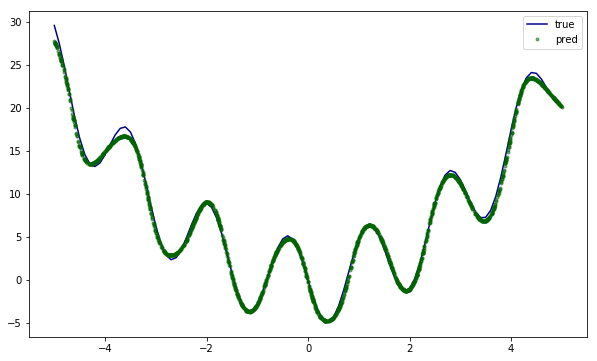

In [26]:
plt.figure(figsize = (10,6))
plt.plot(torch.arange(-5,5,0.1), f(torch.arange(-5,5,0.1)), color = "darkblue", label = "true")
plt.plot(Xtest, my_network(Xtest)[:,0].detach().numpy(), ".", label = "pred", color = "darkgreen", alpha = 0.5)
plt.legend()

**Exercice 7** : On change maintenant la définition du réseau de neurones : on va utiliser la fonction ReLU comme la fonction d'activation des couches cachées et nommer le nouveau réseau `my_network2`.

Compléter la définition de `my_network2` et exécuter la prochaine cellule. Que constatez-vous ?

In [ ]:
# Réponse pour l'exercice 7 : 

my_network2 = nn.Sequential(
            
    # Remplir votre programme ici
  
        )

loss_function = nn.MSELoss()


learning_rate = 1e-2
error_train=[]
error_test=[]
batch_size=3000

for t in tqdm(range(50000)):
    batch = np.random.choice(N_train, batch_size)
    X_batch, y_batch = Xtrain[batch], Ytrain[batch]
        
    Y_pred = my_network2(X_batch)
    loss=loss_function(Y_pred,y_batch)
    my_network2.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in my_network2.parameters():
            param -= learning_rate * param.grad
    if t%10000==0:
        print (loss_function(my_network2(Xtrain),Ytrain))
        error_train.append(loss_function(my_network2(Xtrain),Ytrain))
        print (loss_function(my_network2(Xtest),Ytest))
        error_test.append(loss_function(my_network2(Xtest),Ytest))
        
loss_test=loss_function(my_network2(Xtest),Ytest)
print (loss_test)

plt.figure(figsize = (12,8))
plt.plot(torch.arange(-5,5,0.1), f(torch.arange(-5,5,0.1)), color = "darkblue", label = "true")
plt.plot(Xtest, my_network2(Xtest)[:,0].detach().numpy(), ".", label = "pred", color = "darkgreen", alpha = 0.5)
plt.legend()

------------------------------

## 3. *(Optionnel)* Classe `nn.Module`, `optimiser` et `dataset` de Pytorch <a class="anchor" id="chapter3"></a>

On utilise souvent `nn.Module` pour la définition du réseau de neurones. Comparé avec `nn.Sequential`, `nn.Module` nous permet de créer des structures de réseau plus compliquées. 

Référence de `nn.Module` : https://pytorch.org/docs/stable/generated/torch.nn.Module.html 

In [99]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_sigmoid_stack = nn.Sequential(
            nn.Linear(1, 32),
            nn.Sigmoid(),
                       
            nn.Linear(32, 32),
            nn.Sigmoid(),
                       
            nn.Linear(32, 1),
        )

    def forward(self, x):
        target = self.linear_sigmoid_stack(x)
        return target

model = NeuralNetwork()

Pour obtenir des explications de `nn.Module`, on peut simplement utiliser `help(nn.Module)`.

In [67]:
help(nn.Module)

Help on class Module in module torch.nn.modules.module:

class Module(builtins.object)
 |  Base class for all neural network modules.
 |  
 |  Your models should also subclass this class.
 |  
 |  Modules can also contain other Modules, allowing to nest them in
 |  a tree structure. You can assign the submodules as regular attributes::
 |  
 |      import torch.nn as nn
 |      import torch.nn.functional as F
 |  
 |      class Model(nn.Module):
 |          def __init__(self):
 |              super(Model, self).__init__()
 |              self.conv1 = nn.Conv2d(1, 20, 5)
 |              self.conv2 = nn.Conv2d(20, 20, 5)
 |  
 |          def forward(self, x):
 |              x = F.relu(self.conv1(x))
 |              return F.relu(self.conv2(x))
 |  
 |  Submodules assigned in this way will be registered, and will have their
 |  parameters converted too when you call :meth:`to`, etc.
 |  
 |  :ivar training: Boolean represents whether this module is in training or
 |                  eval

*Qu'est-ce que `__init__` dans la structure de classe ?* On peut également utiliser `help()`.

In [55]:
help(nn.Module.__init__)

Help on function __init__ in module torch.nn.modules.module:

__init__(self)
    Initializes internal Module state, shared by both nn.Module and ScriptModule.



Ensuite, le `super(NeuralNetwork, self).__init__()` indique une sous-classe de `nn.Module`. Avec cette définition, nous peut utiliser tout le code pré-défini et déjà implémenté dans la classe `nn.Module` de PyTorch.

Pour plus d'information, voir e.g. : http://www.sharetechnote.com/html/Python_PyTorch_nn_Module_01.html#Some_Basics_on_the_Class

**Exercice 8** : Utiliser la fonction `help` pour comprendre la defintion de `forward`.

In [ ]:
# Réponse pour l'exercice 8 : 




On va prendre la même `loss_function` que dans la section précédente.

Dans la cellule prochaine, `DataLoader` prépare les mini-batchs pour l'algorithme d'optimisation (par exemple, SGD). 

In [100]:
loss_function = nn.MSELoss()

learning_rate = 1e-3
batch_size = 100
epochs = 5000

dataset_train = TensorDataset(Xtrain,Ytrain.type(torch.float))
train_dataloader = DataLoader(dataset_train, batch_size=batch_size)


On choisit maintenant une méthode d'entrainement du réseau de neurones dans `torch.optim`. Référence: https://pytorch.org/docs/stable/optim.html.

On va utiliser e.g. Adam comme méthode d'optimisation (Projet 8, https://arxiv.org/abs/1412.6980).

In [93]:
# Si on souhaite utiliser la descente de gradient stochastique...
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# On peut également changer la méthode d'entraînement. 
# Par exemple, on change SGD à Adam (Projet 8).

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

La procédure d'entraînement est comme suit : 

In [101]:
def train_loop(dataloader, model, loss_fn, optimizer):
    for batch, (X, y) in enumerate(dataloader):
        # Forward compute
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Commençons l'entrainement du réseau de neurones (par Adam).

In [ ]:
loss_trace = []
for epoch in tqdm(range(epochs)):
    train_loop(train_dataloader, model, loss_function, optimizer)
    current_test_loss = loss_function(model(Xtest),Ytest)
    if epoch%300==0:
        print (current_test_loss)
    loss_trace.append(current_test_loss)
        
print("Done!")

In [ ]:
loss_test_final=loss_trace[-1]
print ("L'erreur sur l'ensemble de test est", loss_test_final)

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(np.array(loss_trace))
plt.title("La courbe de l'erreur sur l'ensemble de test")

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(torch.arange(-5,5,0.1), f(torch.arange(-5,5,0.1)), color = "darkblue", label = "true")
plt.plot(Xtest, model(Xtest)[:,0].detach().numpy(), ".", label = "pred", color = "darkgreen", alpha = 0.5)
plt.legend()